In [1]:
#Import the required libraries
#Import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from csv file
# Remove the';' as delimiter and set ',' as delimiter

df_Siemens = pd.read_csv(r"C:\Users\Johannes\Documents\Machine Learning 2\Beispieldatensatz Siemens S7 SPS.csv", 
                         delimiter=';')
df_Beckhoff = pd.read_csv(r"C:\Users\Johannes\Documents\Machine Learning 2\Beispieldatensatz Beckhoff SPS.csv"
                          ,delimiter=';')
# Warnings for outdated packages are ignored and not printed in the console
import warnings
warnings.filterwarnings('ignore')

C:\Users\Johannes\AppData\Local\Temp\ipykernel_1896\3802563259.py:11: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,15,16,20,21,22,23,24,25,26,27,28,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,113,114,115,116,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Siemens = pd.read_csv(r"C:\Users\Johannes\Documents\Machine Learning 2\Beispieldatensatz Siemens S7 SPS.csv",


Betrachtung des Siemens-Datensatzes

In [2]:
#Show the first 5 rows of the data

df_Siemens.head()

,timestamp,M34.4,M24.7,M25.3,M25.4,I200.7,M38.0,M38.1,A0.1,A0.0,...,E1.5,E1.6,E0.2,E6.0,E6.1,E200.0,E200.1,E1.7,E200.2,Unnamed: 143
0,1569522074515,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
1,1569522074773,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
2,1569522074850,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
3,1569522074972,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
4,1569522075064,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN


In [3]:
#Convert die Datetime column to datetime format
df_Siemens['timestamp'] = pd.to_datetime(df_Siemens['timestamp'])

In [4]:
#Show the first 5 rows of the data

df_Siemens.head()

,timestamp,M34.4,M24.7,M25.3,M25.4,I200.7,M38.0,M38.1,A0.1,A0.0,...,E1.5,E1.6,E0.2,E6.0,E6.1,E200.0,E200.1,E1.7,E200.2,Unnamed: 143
0,1970-01-01 00:26:09.522074515,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
1,1970-01-01 00:26:09.522074773,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
2,1970-01-01 00:26:09.522074850,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
3,1970-01-01 00:26:09.522074972,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN
4,1970-01-01 00:26:09.522075064,False,False,True,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,NaN


In [5]:

#remove columns with the same values 
df_Siemens = df_Siemens.loc[:, df_Siemens.apply(pd.Series.nunique) != 1]

In [6]:
#Show the first 5 rows of the data

df_Siemens.head()

,timestamp,M24.7,M25.3,M25.4,I200.7,A0.1,A0.0,M1.0,M1.1,MW16,...,E1.0,E1.1,E1.2,E1.3,E1.4,E1.5,E1.6,E0.2,E200.0,Unnamed: 143
0,1970-01-01 00:26:09.522074515,False,True,False,False,False,False,False,False,1945.0,...,True,False,True,False,True,False,True,True,False,NaN
1,1970-01-01 00:26:09.522074773,False,True,False,False,False,False,False,False,1843.0,...,True,False,True,False,True,False,True,True,False,NaN
2,1970-01-01 00:26:09.522074850,False,True,False,False,False,False,False,False,1877.0,...,True,False,True,False,True,False,True,True,False,NaN
3,1970-01-01 00:26:09.522074972,False,True,False,False,False,False,False,False,1911.0,...,True,False,True,False,True,False,True,True,False,NaN
4,1970-01-01 00:26:09.522075064,False,True,False,False,False,False,False,False,2013.0,...,True,False,True,False,True,False,True,True,False,NaN


In [7]:
#show all columns with missing values

df_Siemens.isnull().sum()

timestamp          0
M24.7              1
M25.3              1
M25.4              1
I200.7             0
                ... 
E1.5               0
E1.6               0
E0.2               0
E200.0             0
Unnamed: 143    6283
Length: 112, dtype: int64

In [8]:
#delete all columns which are unnamed
df_Siemens.drop(df_Siemens.columns[df_Siemens.columns.str.contains('Unnamed')], axis=1, inplace=True)

In [9]:
df_Siemens.shape #Return a tuple representing the dimensionality of the DataFrame

(6283, 111)

Betrachtung des Beckhoff-Datensatzes

In [10]:
#Show the first 5 rows of the data

df_Beckhoff.head()

,timestamp,VG.I1_ref_switch_vertical,VG.I2_ref_switch_horizontal,VG.I3_ref_switch_rotate,VG.B1_encoder_vertical_impulse1,VG.B2_encoder_vertical_impulse2,VG.B3_encoder_horizontal_impulse1,VG.B4_encoder_horizontal_impulse2,VG.B5_encoder_rotate_impulse1,VG.B6_encoder_rotate_impulse2,...,VG.Q6_rotCounterClockwise,VG.Q7_compressorON,VG.Q8_valve,Pallets.Conveyor_belt_lift,VG.atHome,VG.error_robot,WH.isEmpty,WH.desiredPalletX,WH.desiredPalletY,Unnamed: 54
0,1569522074925,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
1,1569522075030,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
2,1569522075128,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
3,1569522075231,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
4,1569522075330,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN


In [11]:
#Convert die timestamp column to datetime format

df_Beckhoff['timestamp'] = pd.to_datetime(df_Beckhoff['timestamp'],unit='ms')



In [12]:
#Show the first 5 rows of the data

df_Beckhoff.head()

,timestamp,VG.I1_ref_switch_vertical,VG.I2_ref_switch_horizontal,VG.I3_ref_switch_rotate,VG.B1_encoder_vertical_impulse1,VG.B2_encoder_vertical_impulse2,VG.B3_encoder_horizontal_impulse1,VG.B4_encoder_horizontal_impulse2,VG.B5_encoder_rotate_impulse1,VG.B6_encoder_rotate_impulse2,...,VG.Q6_rotCounterClockwise,VG.Q7_compressorON,VG.Q8_valve,Pallets.Conveyor_belt_lift,VG.atHome,VG.error_robot,WH.isEmpty,WH.desiredPalletX,WH.desiredPalletY,Unnamed: 54
0,2019-09-26 18:21:14.925,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
1,2019-09-26 18:21:15.030,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
2,2019-09-26 18:21:15.128,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
3,2019-09-26 18:21:15.231,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN
4,2019-09-26 18:21:15.330,True,True,False,True,False,False,False,False,True,...,False,False,False,800,False,False,False,1620,110,NaN


In [13]:
#remove columns with the same values 

df_Beckhoff = df_Beckhoff.loc[:, df_Beckhoff.apply(pd.Series.nunique) != 1]



In [14]:
#Show the first 5 rows of the data

df_Beckhoff.head()
df_Beckhoff.shape

(5197, 47)

In [15]:
#show all columns with missing values

df_Beckhoff.isnull().sum()


timestamp                                    0
VG.I1_ref_switch_vertical                    0
VG.I2_ref_switch_horizontal                  0
VG.B1_encoder_vertical_impulse1              0
VG.B2_encoder_vertical_impulse2              0
VG.B3_encoder_horizontal_impulse1            0
VG.B4_encoder_horizontal_impulse2            0
VG.B5_encoder_rotate_impulse1                0
VG.B6_encoder_rotate_impulse2                0
WH.I1_Ref_switch_horizontal                  0
WH.I2_Light_barrier_inside                   0
WH.I3_Light_barrier_outside                  0
WH.I5_Ref_switch_cantilever_front            0
WH.I6_Ref_switch_cantilever_back             0
WH.B1_encoder_horizontal_impuls1             0
WH.B2_encoder_horizontal_impuls2             0
WH.B3_encoder_vertical_impuls1               0
WH.B4_encoder_vertical_impuls2               0
Visual.start                                 0
Visual.Stoplight                             0
VG.safeCurtainShort                          0
WH.Q3_horizon

In [16]:
#delete all columns which are unnamed

df_Beckhoff.drop(df_Beckhoff.columns[df_Beckhoff.columns.str.contains('Unnamed')], axis=1, inplace=True)




Zusammengefügte Datensätze


In [17]:
#Merge the two dataframes and sort the values by timestamp

df_Gesamt = pd.merge(df_Beckhoff, df_Siemens, on='timestamp', how='outer', suffixes=['_beckhoff', '_siemens'])
df = df_Gesamt.sort_values('timestamp')
df_Gesamt.set_index('timestamp', inplace=True)

df_Gesamt.replace({False: 0, True: 1}, inplace=True)

df_Gesamt = df_Gesamt.ffill(axis = 0)
df_Gesamt = df_Gesamt.dropna()
print(df_Gesamt)






                               VG.I1_ref_switch_vertical  \
timestamp                                                  
1970-01-01 00:26:09.522074515                        1.0   
1970-01-01 00:26:09.522074773                        1.0   
1970-01-01 00:26:09.522074850                        1.0   
1970-01-01 00:26:09.522074972                        1.0   
1970-01-01 00:26:09.522075064                        1.0   
...                                                  ...   
1970-01-01 00:26:09.522579987                        1.0   
1970-01-01 00:26:09.522580061                        1.0   
1970-01-01 00:26:09.522580137                        1.0   
1970-01-01 00:26:09.522580213                        1.0   
1970-01-01 00:26:09.522580239                        1.0   

                               VG.I2_ref_switch_horizontal  \
timestamp                                                    
1970-01-01 00:26:09.522074515                          1.0   
1970-01-01 00:26:09.522074773    

In [18]:
print(df_Gesamt.shape) #Return a tuple representing the dimensionality of the DataFrame.

(6283, 155)


In [19]:
#show all columns with missing values

df_Siemens.isnull().sum()



timestamp    0
M24.7        1
M25.3        1
M25.4        1
I200.7       0
            ..
E1.4         0
E1.5         0
E1.6         0
E0.2         0
E200.0       0
Length: 111, dtype: int64

In [20]:
#show all columns with missing values	

df_Beckhoff.isnull().sum()

timestamp                                 0
VG.I1_ref_switch_vertical                 0
VG.I2_ref_switch_horizontal               0
VG.B1_encoder_vertical_impulse1           0
VG.B2_encoder_vertical_impulse2           0
VG.B3_encoder_horizontal_impulse1         0
VG.B4_encoder_horizontal_impulse2         0
VG.B5_encoder_rotate_impulse1             0
VG.B6_encoder_rotate_impulse2             0
WH.I1_Ref_switch_horizontal               0
WH.I2_Light_barrier_inside                0
WH.I3_Light_barrier_outside               0
WH.I5_Ref_switch_cantilever_front         0
WH.I6_Ref_switch_cantilever_back          0
WH.B1_encoder_horizontal_impuls1          0
WH.B2_encoder_horizontal_impuls2          0
WH.B3_encoder_vertical_impuls1            0
WH.B4_encoder_vertical_impuls2            0
Visual.start                              0
Visual.Stoplight                          0
VG.safeCurtainShort                       0
WH.Q3_horizontal_towards_rack             0
WH.Q3_horRack                   

In [21]:
#import the required libraries for KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




ModuleNotFoundError: No module named 'kneed'

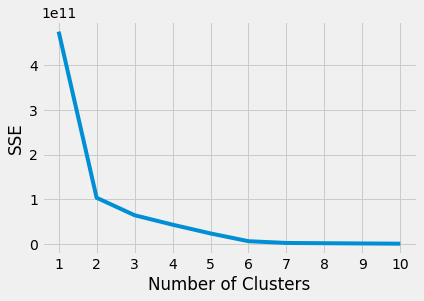

In [ ]:
params = {'init': 'k-means++', 'n_init': 10, 'max_iter': 300,
    'tol': 0.0001, 'verbose': 0, 'random_state': 50, 'copy_x': True,
    'algorithm': 'auto'}
#create SSE graph to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **params)
    kmeans.fit(df_Gesamt)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#find the optimal number of clusters in the data without plotting the graph
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

2


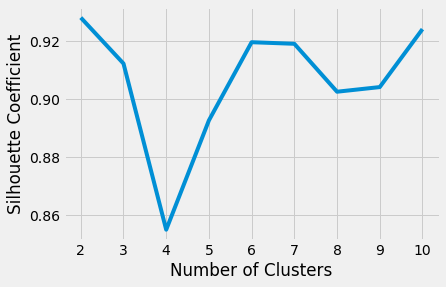

In [ ]:
# create silhouette coefficient graph to find the optimal number of clusters
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **params)
    kmeans.fit(df_Gesamt)
    score = silhouette_score(df_Gesamt, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# end of mentioned source.

In [ ]:
#use kmeans to find the annomalies in the data
kmeans = KMeans(n_clusters=2, **params)
kmeans.fit(df_Gesamt)
predictions = kmeans.predict(df_Gesamt)
df_Gesamt['predictions'] = pd.Series(predictions, index=df_Gesamt.index)
df_Gesamt.to_csv('out.csv', sep=',')



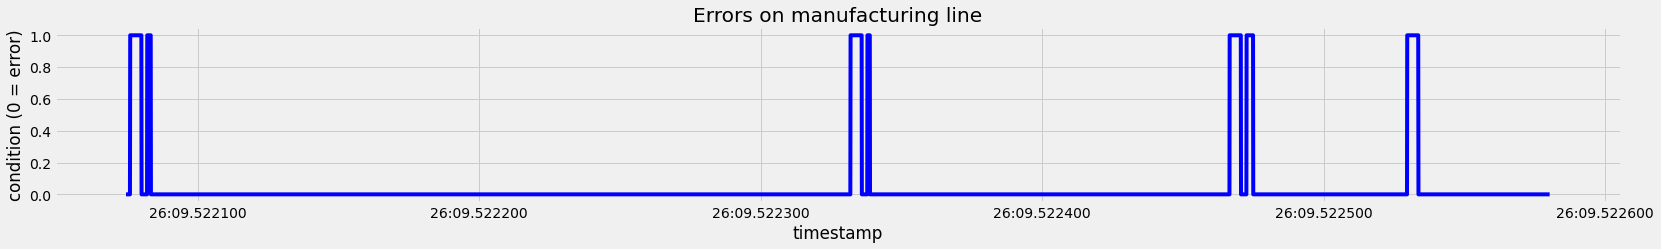

In [ ]:
#ploting the data to visualize the anomalies
plt.figure(figsize=(25, 3))
plt.plot(df_Gesamt.index, df_Gesamt['predictions'],color='blue')
plt.title('Errors on manufacturing line')
plt.xlabel('timestamp')
plt.ylabel('condition (0 = error)')
plt.show()

In [ ]:
#save the errors in a csv file and gives the data of the anomalies back
df_error = df_Gesamt[df_Gesamt['predictions'] == 0]
df_error.to_csv('errors_out.csv', sep=',')